## A1. Applying a Logistic Regression model with L1 penalty using Sklearn

In [155]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from matplotlib import cm

from matplotlib import font_manager
font_path = 'C://Users//amita//AppData//Local//Microsoft//Windows//Fonts/Barlow-Regular.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [140]:
data = pd.read_csv('chowdary.csv', index_col=0)

y = data['tumour']
X = data.drop('tumour', axis=1)

In [141]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=data.columns[1:])

In [147]:
clf = LogisticRegressionCV(Cs=np.round(np.linspace(0.0, 2, 11)[1:], 2), cv=5, penalty='l1', solver='liblinear', tol=1e-6, max_iter=10000, scoring='f1')
clf.fit(X_scaled, y)

coeff_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': clf.coef_[0]})
coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)
print(coeff_df[coeff_df['Coefficient']!=0].shape)
coeff_df[coeff_df['Coefficient']!=0]

(20, 2)


,Variable,Coefficient
48,X204653_at,-1.644393
14,X202831_at,1.574704
15,X202859_x_at,1.151078
114,X209604_s_at,-0.832922
101,X209016_s_at,-0.698364
141,X213953_at,0.652307
127,X212236_x_at,0.571815
6,X201909_at,0.502226
108,X209351_at,-0.471725
28,X203691_at,0.375721


In [145]:
coeff_df[coeff_df['Coefficient']!=0].to_clipboard()

In [130]:
### Penalty term(lambda) vs 5 fold cross validation score:

dict(zip(np.round(np.linspace(0.0, 2, 11)[1:], 2), np.mean(clf.scores_['C'], axis=0)))

{0.2: 0.8927908005307387,
 0.4: 0.9344341245270039,
 0.6: 0.9344341245270039,
 0.8: 0.9344341245270039,
 1.0: 0.9344341245270039,
 1.2: 0.9448916408668732,
 1.4: 0.9566563467492261,
 1.6: 0.9566563467492261,
 1.8: 0.9566563467492261,
 2.0: 0.9566563467492261}

In [131]:
print(f"Best penalty value is: {clf.C_}")

Best penalty value is: [1.4]


### We have got useful and important 20 variables, but we Lasso might have removed some correlated variables that might be important too.

In [122]:
from sklearn.metrics import f1_score

In [132]:
f1_score(y.values, clf.predict(X_scaled), average="binary", pos_label="B")

0.991869918699187

##  A2. Lasso with original X values(not standardized)
### Let's see what was the affect of standardizing the X values in comparison to original values

In [133]:
clf = LogisticRegressionCV(Cs=np.round(np.linspace(0.0, 2, 11)[1:], 2), cv=5, penalty='l1', solver='liblinear', tol=1e-6, max_iter=10000, scoring='f1')
clf.fit(X, y)

coeff_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': clf.coef_[0]})
coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)
print(coeff_df[coeff_df['Coefficient']!=0].shape)
coeff_df[coeff_df['Coefficient']!=0]

(19, 2)


,Variable,Coefficient
135,X213435_at,-0.016624
15,X202859_x_at,0.007446
114,X209604_s_at,-0.006881
5,X201884_at,0.006626
127,X212236_x_at,0.005627
27,X203649_s_at,0.005265
108,X209351_at,-0.005035
130,X212768_s_at,-0.004829
2,X201496_x_at,0.004247
157,X217148_x_at,-0.004138


### There's change in important coefficients. Let's see how it affects best penalty value along with f1 score

In [134]:
print(f"Best penalty value is: {clf.C_}")

Best penalty value is: [0.2]


In [135]:
f1_score(y.values, clf.predict(X_scaled), average="binary", pos_label="B")

0.959349593495935

### The model itself isn't doing as good as it was with standardized values. But Lasso itself doesn't help as due to high correlation, it might be removing useful variables. Let's perform Logistic Regression using elasitcnet.

# Using statsmodels' logit fit regularized to perform same

In [160]:
from statsmodels.discrete.discrete_model import Logit

### Remember that C in sklearn model is used differently here and called alpha(but they both are the weight multiplying the l1 penalty term).

In [168]:
enc = LabelEncoder()
y_encoded = enc.fit_transform(y)
model = Logit(y_encoded, X_scaled)

fitted_log_l1 = model.fit_regularized(alpha=1)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1536023497140418
            Iterations: 249
            Function evaluations: 249
            Gradient evaluations: 249


In [169]:
fitted_log_l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  104
Model:                          Logit   Df Residuals:                       82
Method:                           MLE   Df Model:                           21
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.9106
Time:                        10:26:57   Log-Likelihood:                -6.2707
converged:                       True   LL-Null:                       -70.152
Covariance Type:            nonrobust   LLR p-value:                 2.642e-17
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
X201123_s_at          0        nan        nan        nan         nan         nan
X201262_s_at          0        nan        nan        nan         nan         nan
X201496_x_at     0.3297      0.616      0.536      0.592      -0.877       1.537
X201497_x_at          0        nan        nan        nan         nan         nan
X201525_at      -0.1900      0.914     -0.208      0.835      -1.982       1.602
X201884_at            0        nan        nan        nan         nan         nan
X201909_at       0.4779      1.612      0.297      0.767      -2.681       3.637
X202018_s_at          0        nan        nan        nan         nan         nan
X202037_s_at          0        nan        nan        nan         nan         nan
X202286_s_at -2.068e-16      1.425  -1.45e-16      1.000      -2.793       2.793
X202376_at      -0.1043      0.781     -0.133      0.894      -1.635       1.426
X202437_s_at          0        nan        nan        nan         nan         nan
X202504_at            0        nan        nan        nan         nan         nan
X202575_at      -0.2264      1.060     -0.214      0.831      -2.304       1.851
X202831_at       2.5756      3.215      0.801      0.423      -3.725       8.877
X202859_x_at     1.3847      1.757      0.788      0.431      -2.058       4.828
X202952_s_at          0        nan        nan        nan         nan         nan
X202992_at            0        nan        nan        nan         nan         nan
X203029_s_at          0        nan        nan        nan         nan         nan
X203240_at            0        nan        nan        nan         nan         nan
X203256_at            0        nan        nan        nan         nan         nan
X203290_at            0        nan        nan        nan         nan         nan
X203438_at            0        nan        nan        nan         nan         nan
X203453_at            0        nan        nan        nan         nan         nan
X203510_at            0        nan        nan        nan         nan         nan
X203559_s_at          0        nan        nan        nan         nan         nan
X203638_s_at          0        nan        nan        nan         nan         nan
X203649_s_at          0        nan        nan        nan         nan         nan
X203691_at       0.1272      1.447      0.088      0.930      -2.708       2.963
X203757_s_at          0        nan        nan        nan         nan         nan
X203824_at            0        nan        nan        nan         nan         nan
X203895_at            0        nan        nan        nan         nan         nan
X203896_s_at          0        nan        nan        nan         nan         nan
X203951_at            0        nan        nan        nan         nan         nan
X203953_s_at          0        nan        nan        nan         nan         nan
X203980_at            0        nan        nan        nan         nan         nan
X204041_at            0        nan        nan        nan         nan         nan
X

### And finally the bic value

In [172]:
fitted_log_l1.bic

114.71804862954525

## Now let's try to perform cross validation on this:

In [182]:
X_scaled = X_scaled.values.copy()

In [184]:
import numpy as np
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import KFold

# Set up the values of alpha to test
alphas = np.linspace(0, 1, num=11)

# Initialize a list to store the bic values for each fold and alpha value
bic_values = []
aic_values = []

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop over the different alpha values
for alpha in alphas:
    # Initialize a list to store the bic values for this alpha value
    alpha_bic_values = []
    alpha_aic_values = []
    
    # Loop over the different folds
    for train_idx, val_idx in kf.split(X_scaled):
        # Split the data into training and validation sets for this fold
        X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
        y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]
        
        # Fit the model on the training set for this fold and alpha value
        model = Logit(y_train, X_train)
        fitted_log = model.fit_regularized(alpha=alpha)
               
        # Add the bic and aic value to the list for this alpha value
        alpha_bic_values.append(fitted_log.bic)
        alpha_aic_values.append(fitted_log.aic)
    
    # Add the mean bic value to the list of bic values for all alpha values
    bic_values.append(np.mean(alpha_bic_values))
    aic_values.append(np.mean(alpha_aic_values))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.198452647963182e-08
            Iterations: 37
            Function evaluations: 37
            Gradient evaluations: 37
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.3017456618754243e-08
            Iterations: 38
            Function evaluations: 38
            Gradient evaluations: 38
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9.979955042571867e-11
            Iterations: 42
            Function evaluations: 43
            Gradient evaluations: 42
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0025823987305577e-10
            Iterations: 43
            Function evaluations: 43
            Gradient evaluations: 43
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.205310428406975e-08
            Iterations: 28
       

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.12093938909482921
            Iterations: 235
            Function evaluations: 235
            Gradient evaluations: 235
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.14102422474856977
            Iterations: 196
            Function evaluations: 196
            Gradient evaluations: 196
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1540025416428349
            Iterations: 211
            Function evaluations: 211
            Gradient evaluations: 211
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.15623369113872182
            Iterations: 210
            Function evaluations: 210
            Gradient evaluations: 210
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.15866829460246856
            Iterations: 256
       

In [185]:
# Find the index of the alpha value that gives the best bic value overall
best_alpha_idx = np.argmin(bic_values)

# Get the alpha value that gives the best bic value overall
best_alpha = alphas[best_alpha_idx]

# Print the best alpha value and the corresponding bic value
print("Best alpha: {:.1f}".format(best_alpha))
print("Best bic: {:.2f}".format(bic_values[best_alpha_idx]))

Best alpha: 0.1
Best bic: 94.24


In [186]:
# Find the index of the alpha value that gives the best bic value overall
best_alpha_idx = np.argmin(aic_values)

# Get the alpha value that gives the best bic value overall
best_alpha = alphas[best_alpha_idx]

# Print the best alpha value and the corresponding bic value
print("Best alpha: {:.1f}".format(best_alpha))
print("Best bic: {:.2f}".format(aic_values[best_alpha_idx]))

Best alpha: 0.1
Best bic: 43.40


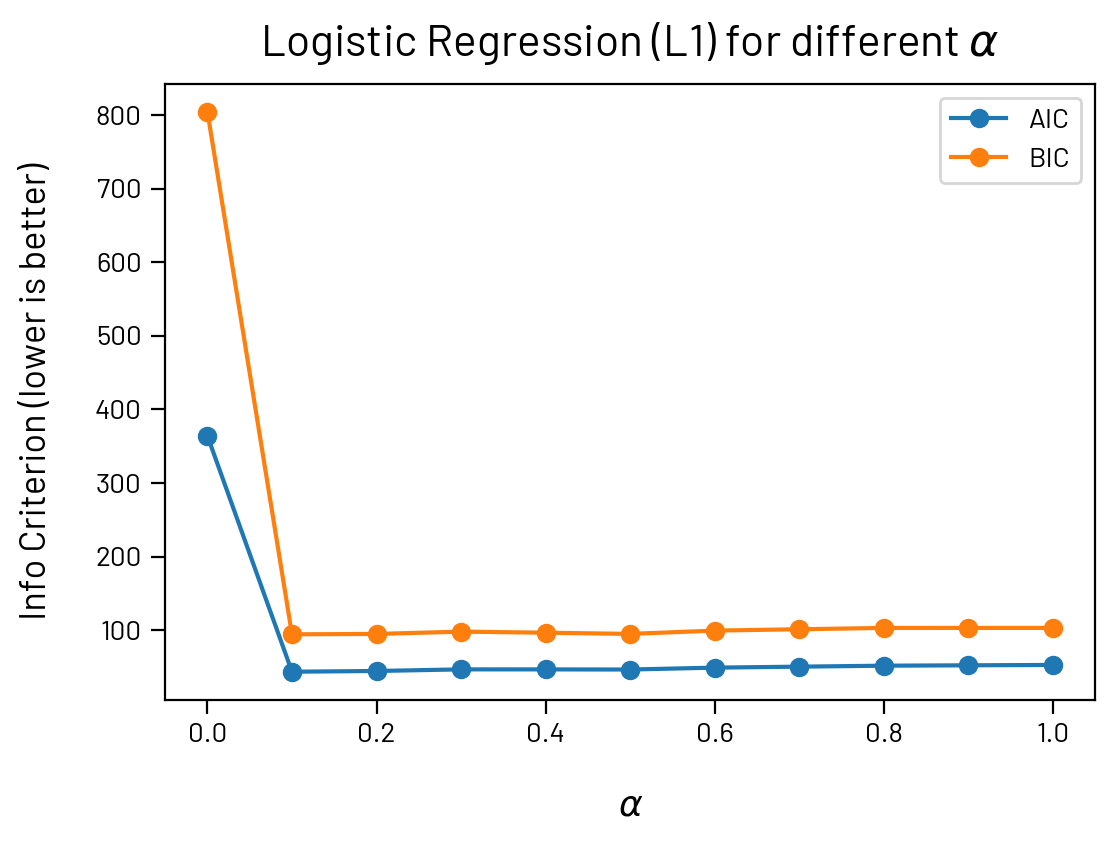

In [270]:
plt.figure(figsize=(6,4), dpi=200)
# create a plot with two lines
plt.plot(alphas, aic_values, 'o-', lw=1.5, label='AIC')
plt.plot(alphas, bic_values, 'o-', lw=1.5, label='BIC')

# add title and labels
plt.title(r'Logistic Regression (L1) for different $\alpha$', fontsize=16, pad=10)
plt.xlabel(r'$\alpha$', fontsize=13, labelpad=15)
plt.ylabel('Info Criterion (lower is better)', fontsize=13, labelpad=15)
plt.tick_params(size=5, labelsize=10)

# add legend and show plot
plt.legend()
plt.show()

## Fitting the best model with best alpha

In [286]:
model = Logit(y_encoded, sm.add_constant(X_scaled))

fitted_log_l1 = model.fit_regularized(alpha=0.1)

### And finally the bic value
fitted_log_l1.bic

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03254353805860829
            Iterations: 430
            Function evaluations: 431
            Gradient evaluations: 430


122.37377782106523

In [287]:
fitted_log_l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  104
Model:                          Logit   Df Residuals:                       78
Method:                           MLE   Df Model:                           25
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.9885
Time:                        19:22:28   Log-Likelihood:               -0.80981
converged:                       True   LL-Null:                       -70.152
Covariance Type:            nonrobust   LLR p-value:                 9.944e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0        nan        nan        nan         nan         nan
x1                  0        nan        nan        nan         nan         nan
x2                  0        nan        nan        nan         nan         nan
x3             1.0761      2.218      0.485      0.627      -3.270       5.423
x4                  0        nan        nan        nan         nan         nan
x5            -0.1220      3.763     -0.032      0.974      -7.497       7.253
x6                  0        nan        nan        nan         nan         nan
x7             3.0160      4.192      0.719      0.472      -5.201      11.233
x8                  0        nan        nan        nan         nan         nan
x9                  0        nan        nan        nan         nan         nan
x10           -0.0510      5.178     -0.010      0.992     -10.199      10.097
x11           -0.2462      3.164     -0.078      0.938      -6.448       5.956
x12                 0        nan        nan        nan         nan         nan
x13                 0        nan        nan        nan         nan         nan
x14           -0.2603      3.493     -0.075      0.941      -7.107       6.586
x15            1.9110     11.128      0.172      0.864     -19.899      23.721
x16            1.6401      6.322      0.259      0.795     -10.750      14.030
x17                 0        nan        nan        nan         nan         nan
x18                 0        nan        nan        nan         nan         nan
x19            0.2055      8.169      0.025      0.980     -15.805      16.216
x20                 0        nan        nan        nan         nan         nan
x21                 0        nan        nan        nan         nan         nan
x22                 0        nan        nan        nan         nan         nan
x23                 0        nan        nan        nan         nan         nan
x24                 0        nan        nan        nan         nan         nan
x25                 0        nan        nan        nan         nan         nan
x26                 0        nan        nan        nan         nan         nan
x27                 0        nan        nan        nan         nan         nan
x28                 0        nan        nan        nan         nan         nan
x29            1.4639      4.300      0.340      0.734      -6.964       9.892
x30                 0        nan        nan        nan         nan         nan
x31                 0        nan        nan        nan         nan         nan
x32                 0        nan        nan        nan         nan         nan
x33                 0        nan        nan        nan         nan         nan
x34                 0        nan        nan        nan         nan         nan
x35                 0        nan        nan        nan         nan         nan
x36                 0        nan        nan        nan         nan         nan
x37                 0        nan        nan        nan         nan         nan
x3

In [289]:
f1_score(y_encoded, np.round(fitted_log_l1.predict(sm.add_constant(X_scaled))))

1.0

In [298]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

coeff_df = pd.DataFrame(X.columns, columns=['feature'])
coeff_df['Coefficient'] = fitted_log_l1.params[1:]
coeff_df['p_values'] = fitted_log_l1.pvalues[1:]

coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)
print(coeff_df[coeff_df['Coefficient']!=0].shape)
coeff_df[coeff_df['Coefficient']!=0]

(26, 3)


,feature,Coefficient,p_values
141,X213953_at,4.262,0.630
6,X201909_at,3.016,0.472
147,X214768_x_at,-2.424,0.763
48,X204653_at,-2.110,0.811
14,X202831_at,1.911,0.864
15,X202859_x_at,1.640,0.795
28,X203691_at,1.464,0.734
42,X204470_at,1.238,0.890
127,X212236_x_at,1.228,0.501
2,X201496_x_at,1.076,0.627


In [299]:
coeff_df[coeff_df['Coefficient']!=0].to_clipboard()

### Fitting the Logistic Regression model with alpha=0.1

In [282]:
import numpy as np
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import KFold

# Set up the values of alpha to test
alpha = 0.1

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []

# Loop over the different folds
for train_idx, val_idx in kf.split(X_scaled):
    # Split the data into training and validation sets for this fold
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]

    # Fit the model on the training set for this fold and alpha value
    model = Logit(y_train, X_train)
    fitted_log = model.fit_regularized(alpha=alpha)

    # Calculate and add f1 score on validation set
    y_val_pred = fitted_log.predict(X_val)
    y_val_pred_binary = (y_val_pred > 0.5).astype(int)
    f1_scores.append(f1_score(y_val, y_val_pred_binary))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03548555100403328
            Iterations: 364
            Function evaluations: 364
            Gradient evaluations: 364
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03832744659033019
            Iterations: 363
            Function evaluations: 363
            Gradient evaluations: 363
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.039288097380904455
            Iterations: 444
            Function evaluations: 444
            Gradient evaluations: 444
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03694005159117567
            Iterations: 401
            Function evaluations: 401
            Gradient evaluations: 401
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.02696060934344783
            Iterations: 413
     

In [283]:
f1_scores

[0.9411764705882353, 1.0, 1.0, 0.888888888888889, 0.9473684210526316]

In [285]:
np.mean(f1_scores)

0.9554867561059511